# Średnie kroczące i inne operacje w oknach

In [1]:
import pandas as pd

df = pd.read_csv(
    'data/forex_usd_data.csv',
    parse_dates=['date(y-m-d)'],
    index_col='date(y-m-d)',
).rename(columns={
    'Polish Zloty': 'PLN',
    'Euro': 'EUR',
})

In [2]:
df['EUR']

date(y-m-d)
2011-01-01    0.746798
2011-01-02    0.746850
2011-01-03    0.747910
2011-01-04    0.751387
2011-01-05    0.759228
                ...   
2021-09-30    0.863784
2021-10-01    0.862318
2021-10-02    0.862329
2021-10-03    0.862672
2021-10-04    0.860485
Name: EUR, Length: 3930, dtype: float64

In [3]:
# Policzmy tzw. średnią kroczącą w oknie trzech dni:
df['EUR'].rolling(3).mean()

date(y-m-d)
2011-01-01         NaN
2011-01-02         NaN
2011-01-03    0.747186
2011-01-04    0.748716
2011-01-05    0.752842
                ...   
2021-09-30    0.860321
2021-10-01    0.862413
2021-10-02    0.862810
2021-10-03    0.862440
2021-10-04    0.861829
Name: EUR, Length: 3930, dtype: float64

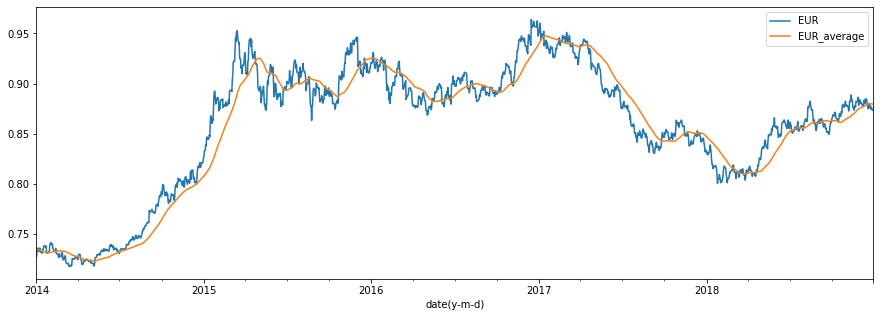

In [5]:
# Doklejmy tą kolumnę do DataFrame i zwizualizujmy wyniki:

df.assign(
    EUR_average=lambda x: x['EUR'].rolling(60).mean(),
)['2014':'2018'].plot(
    y=['EUR', 'EUR_average'],
    figsize=(15, 5),
);

# 🔴 Ćwiczenie

Zacznij od rozwiązania ćwiczenia M08L09. Na wykresie dorysuj dla inflacji maksymalną i minimalną wartość w oknie kroczącym 5 lat.

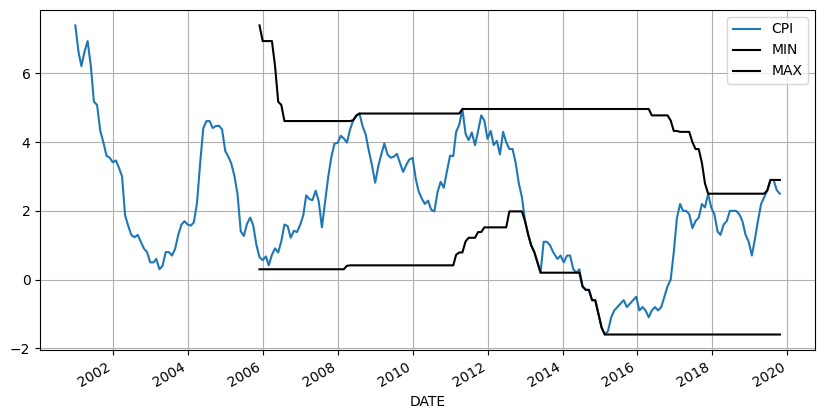

In [4]:
import pandas as pd
import matplotlib.pyplot

macro = pd.read_csv (
        'data\macroeconomicsPL.csv',
        parse_dates=['DATE'],
        index_col='DATE',
        dayfirst=True,
        skipfooter=3,
        engine="python",
        thousands=',',
        na_values={
            'SPD': '-99'
        },
).rename(columns={
    'sr_NBP': 'SR',
    'WIBOR 3M': 'WIBOR'
}).assign(
    DIFF=lambda x: x['CPI'] - x['SR'],
    MIN=lambda x: x['CPI'].rolling(60).min(),
    MAX=lambda x: x['CPI'].rolling(60).max(),
)

macro.plot(
    y=['CPI', 'MIN', 'MAX'],
    figsize=(10,5),
    grid=True,
    style= {
        'MIN':'k',
        'MAX':'k',
    }
);